In [1]:
import sys
sys.path.append('../')

In [2]:
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from utils.eval import score
from utils.models import CentroidSMOTE
from utils.models import KNNModel
from imblearn.over_sampling import SMOTE

# Reading, Preprocessing and EDA

In [3]:
Train_path = "../datasets/ApsFailure/aps_failure_training_set_processed_8bit.csv"
Test_path = "../datasets/ApsFailure/aps_failure_test_set_processed_8bit.csv"
train_df = pd.read_csv(Train_path)
test_df = pd.read_csv(Test_path)

In [4]:
print(train_df.isnull().sum().sum(), train_df.isna().sum().sum())

0 0


In [5]:
list_dtype = [train_df[i].dtype for i in train_df.columns]
dict((i, list_dtype.count(i)) for i in list_dtype)

{dtype('float64'): 171}

In [6]:
label_encoder = LabelEncoder()
train_df['class'] = label_encoder.fit_transform(train_df['class'])
test_df['class'] = label_encoder.transform(test_df['class'])

In [7]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
scl.fit(train_df)
scl.transform(train_df)
y_train = train_df['class']
y_test = test_df['class']
X_train = train_df.drop(['class'], axis = 1)
X_test = test_df.drop(['class'], axis = 1)

In [8]:
y_train.value_counts()

class
0    59000
1     1000
Name: count, dtype: int64

In [9]:
pipeline = Pipeline([
    ('classifier', KNeighborsClassifier())
])

parameters = {
    'classifier__n_neighbors' : [3, 5, 7, 9, 11],
}

In [10]:
y_test = y_test.to_numpy()
y_train = y_train.to_numpy()
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.986375
Error Rate: 0.013624999999999998
Precision: 0.958001
Recall: 0.726251
F1-score: 0.801193
Selectivity: 0.726251
Balanced Accuracy: 0.726251
Geometric Mean: 0.726251


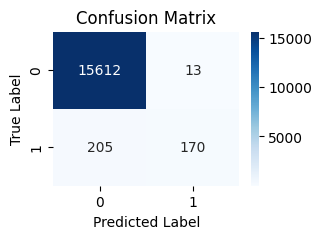

In [11]:
clf = GridSearchCV(pipeline, param_grid = parameters, cv = 5, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train, y_train)
score(X_test, y_test, best_clf)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.975750
Error Rate: 0.024249999999999994
Precision: 0.742944
Recall: 0.908203
F1-score: 0.802794
Selectivity: 0.908203
Balanced Accuracy: 0.908203
Geometric Mean: 0.908203


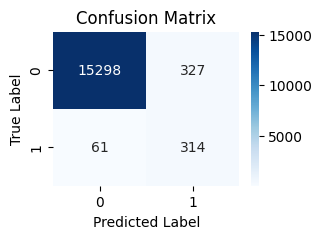

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.972688
Error Rate: 0.027312499999999962
Precision: 0.726123
Recall: 0.914443
F1-score: 0.790056
Selectivity: 0.914443
Balanced Accuracy: 0.914443
Geometric Mean: 0.914443


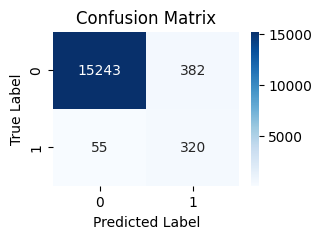

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.970688
Error Rate: 0.029312499999999964
Precision: 0.715942
Recall: 0.910816
F1-score: 0.780193
Selectivity: 0.910816
Balanced Accuracy: 0.910816
Geometric Mean: 0.910816


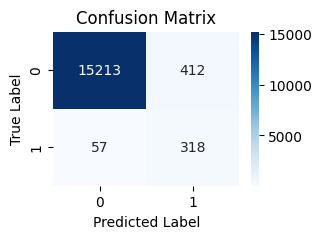

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.970562
Error Rate: 0.029437500000000005
Precision: 0.716190
Recall: 0.919861
F1-score: 0.782293
Selectivity: 0.919861
Balanced Accuracy: 0.919861
Geometric Mean: 0.919861


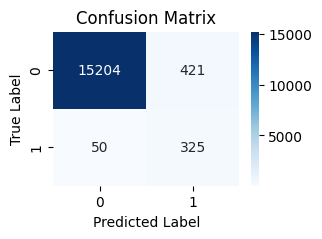

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.969625
Error Rate: 0.03037500000000004
Precision: 0.712404
Recall: 0.924587
F1-score: 0.779712
Selectivity: 0.924587
Balanced Accuracy: 0.924587
Geometric Mean: 0.924587


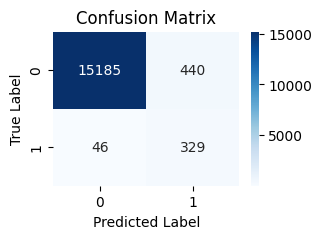

In [12]:
sm_list = []
for i in [3, 5, 7, 9, 11]:
    sm_list.append(SMOTE(random_state=42, k_neighbors=i))
    
for sm in sm_list:
    X_new, y_new = sm.fit_resample(X_train, y_train)
    pipeline = Pipeline([
        ('classifier', KNeighborsClassifier())
    ])

    parameters = {
        'classifier__n_neighbors' : [3, 5, 7, 9, 11],
    }

    clf = GridSearchCV(pipeline, param_grid = parameters, cv = 5, verbose=True, n_jobs=-1)
    best_clf = clf.fit(X_new, y_new)
    score(X_test, y_test, best_clf)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.969375
Error Rate: 0.030625000000000013
Precision: 0.711554
Recall: 0.927061
F1-score: 0.779384
Selectivity: 0.927061
Balanced Accuracy: 0.927061
Geometric Mean: 0.927061


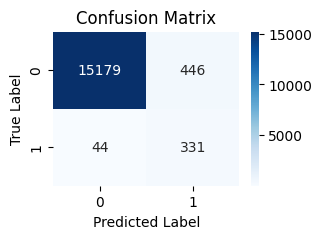

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.965750
Error Rate: 0.03425
Precision: 0.697684
Recall: 0.933013
F1-score: 0.766875
Selectivity: 0.933013
Balanced Accuracy: 0.933013
Geometric Mean: 0.933013


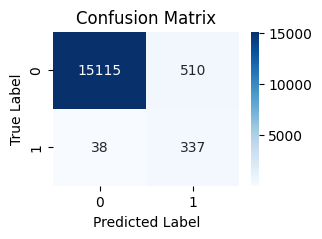

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.963500
Error Rate: 0.03649999999999998
Precision: 0.690233
Recall: 0.937067
F1-score: 0.759851
Selectivity: 0.937067
Balanced Accuracy: 0.937067
Geometric Mean: 0.937067


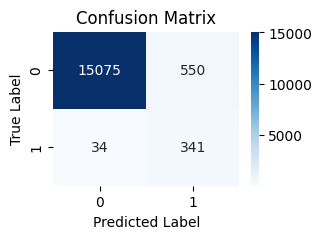

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.965812
Error Rate: 0.03418750000000004
Precision: 0.698224
Recall: 0.935648
F1-score: 0.767848
Selectivity: 0.935648
Balanced Accuracy: 0.935648
Geometric Mean: 0.935648


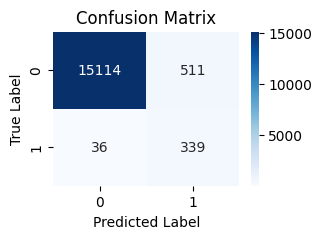

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.967750
Error Rate: 0.03225
Precision: 0.705218
Recall: 0.931435
F1-score: 0.774089
Selectivity: 0.931435
Balanced Accuracy: 0.931435
Geometric Mean: 0.931435


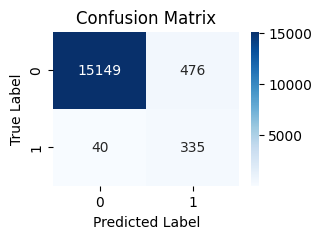

In [13]:
csm_list = []
for (i,j) in [(5,3), (7,3), (9,3), (7,5), (9,7)]:
    csm_list.append(CentroidSMOTE(k_neighbors=i, m_vertices=j))
    
for csm in csm_list:
    X_new, y_new = csm.fit_resample(X_train, y_train)
    pipeline = Pipeline([
        ('classifier', KNeighborsClassifier())
    ])

    parameters = {
        'classifier__n_neighbors' : [3, 5, 7, 9, 11],
    }

    clf = GridSearchCV(pipeline, param_grid = parameters, cv = 5, verbose=True, n_jobs=-1)
    best_clf = clf.fit(X_new, y_new)
    score(X_test, y_test, best_clf)